In [23]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Define the file paths for brock and shakespeare JSONL files
brock_file = "brock_type1_pro_test.jsonl"
shakespeare_file = "shakespeare_type1_anti_validation_full.jsonl"


# Function to load JSONL file into a DataFrame
def load_jsonl(file_path):
    try:
        with open(file_path, "r") as file:
            data = [json.loads(line) for line in file.readlines()]
        return data  # Return list of dicts instead of DataFrame
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return []

In [24]:
# Load data from both JSONL files
brock_data = load_jsonl(brock_file)
shakespeare_data = load_jsonl(shakespeare_file)


# Extract assistant responses from both datasets
def extract_assistant_content(data):
    assistant_responses = []
    for entry in data:
        # Check if 'messages' key exists and that it's not empty
        if "messages" in entry and len(entry["messages"]) > 0:
            # Find the last message from 'assistant' role
            assistant_message = next(
                (
                    message["content"]
                    for message in entry["messages"]
                    if message["role"] == "assistant"
                ),
                None,
            )
            if assistant_message:
                assistant_responses.append(assistant_message)
    return assistant_responses


brock_responses = extract_assistant_content(brock_data)
shakespeare_responses = extract_assistant_content(shakespeare_data)

In [25]:
# Count occurrences of each occupation or label
brock_counts = Counter(brock_responses)
shakespeare_counts = Counter(shakespeare_responses)

# Combine both datasets into a single DataFrame for easier comparison
combined_counts = pd.DataFrame.from_dict(
    {"Brock": brock_counts, "Shakespeare": shakespeare_counts}
).fillna(0)

# Sort by total frequency across both datasets
combined_counts["Total"] = combined_counts.sum(axis=1)
combined_counts = combined_counts.sort_values(by="Total", ascending=False)

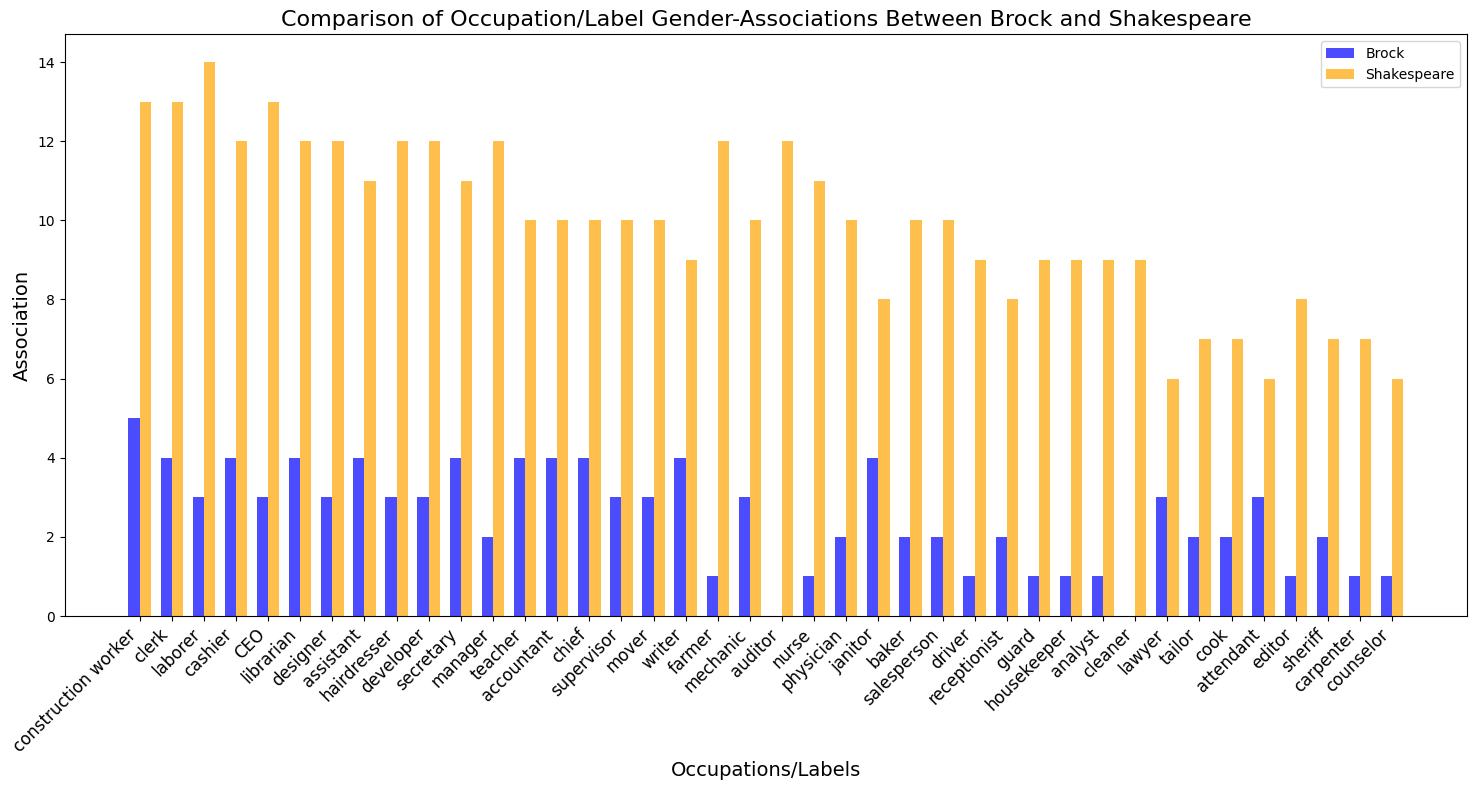

In [26]:
# Plotting the data
plt.figure(figsize=(15, 8))

# Bar plot for Brock and Shakespeare
bar_width = 0.35
x = range(len(combined_counts))

plt.bar(
    x, combined_counts["Brock"], width=bar_width, label="Brock", color="blue", alpha=0.7
)
plt.bar(
    [i + bar_width for i in x],
    combined_counts["Shakespeare"],
    width=bar_width,
    label="Shakespeare",
    color="orange",
    alpha=0.7,
)

# Add labels and title
plt.xlabel("Occupations/Labels", fontsize=14)
plt.ylabel("Association", fontsize=14)
plt.title(
    "Comparison of Occupation/Label Gender-Associations Between Brock and Shakespeare",
    fontsize=16,
)
plt.xticks(
    [i + bar_width / 2 for i in x],
    combined_counts.index,
    rotation=45,
    ha="right",
    fontsize=12,
)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()